## Importing Libraries:

In [1]:
# Importing and loading necessary packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error
from scipy.stats import t
from tabulate import tabulate
from sklearn.metrics import silhouette_score

## Loading Dataset:

In [2]:
# Importing data
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## EDA:

In [3]:
# Viewing data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Checking for any null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, correlation matrix, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")

# Example usage:
explore_data(data)

Major Moments:
                    Mean  Median  Standard Deviation  Skewness  Kurtosis
Id             75.500000   75.50           43.445368  0.000000 -1.200000
SepalLengthCm   5.843333    5.80            0.828066  0.314911 -0.552064
SepalWidthCm    3.054000    3.00            0.433594  0.334053  0.290781
PetalLengthCm   3.758667    4.35            1.764420 -0.274464 -1.401921
PetalWidthCm    1.198667    1.30            0.763161 -0.104997 -1.339754




C:\Users\CORE COM\AppData\Local\Temp\ipykernel_8460\3821239189.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Mean': data.mean(),
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_8460\3821239189.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Median': data.median(),
C:\Users\CORE COM\AppData\Local\Temp\ipykernel_8460\3821239189.py:15: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated.

### Scatter Plot:

In [7]:
def plot_scatter(data, x_feature, y_feature):
    """
    Plots a scatter plot to visualize the relationship between two features in the dataset.

    Scatter plots are useful for visually exploring the relationship between two continuous variables.
    Each point on the plot represents an observation in the dataset, with its x-coordinate determined by one
    feature and its y-coordinate determined by another feature. Additionally, the points are color-coded based
    on a categorical variable, typically representing different groups or classes.

    Parameters:
        data (DataFrame): Input dataset.
            The dataset containing the features to be plotted.
        x_feature (str): Name of the feature to plot on the x-axis.
            The feature to be represented along the horizontal axis of the scatter plot.
        y_feature (str): Name of the feature to plot on the y-axis.
            The feature to be represented along the vertical axis of the scatter plot.

    Returns:
        None
        
    """
    plt.scatter(data[x_feature], data[y_feature], c=data['Species'].astype('category').cat.codes, cmap='viridis')
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.colorbar(label='Species')
    plt.show()

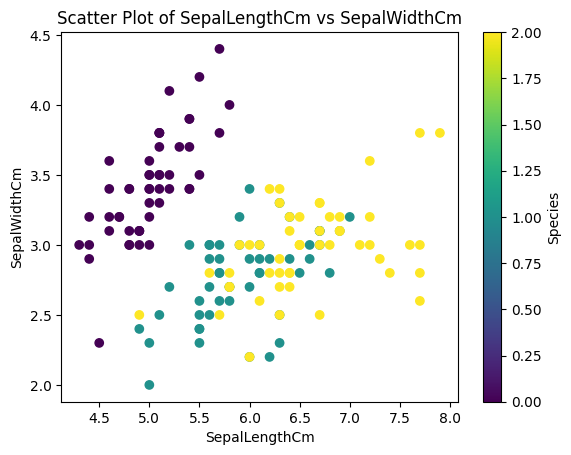

In [8]:
plot_scatter(data, 'SepalLengthCm', 'SepalWidthCm')

The scatter plot illustrates the relationship between sepal length and sepal width for each species of iris flower. It shows distinct clusters corresponding to different species.

There is a noticeable pattern where Setosa species typically have smaller sepal lengths and widths compared to Versicolor and Virginica species, which have more overlap between their sepal dimensions.

### Heatmap:

In [9]:
def plot_heatmap(data):
    """
    Plots a heatmap to visualize the correlation matrix of the input dataset.
    
    This function computes the correlation matrix of the input dataset and plots it as a heatmap.
    Each cell in the heatmap represents the correlation coefficient between two features.
    The correlation coefficient ranges from -1 to 1, where:
        - 1 indicates a perfect positive correlation,
        - -1 indicates a perfect negative correlation, and
        - 0 indicates no correlation between the features.
    
    Parameters:
        data (DataFrame): Input dataset.
            The dataset for which the correlation matrix will be computed and visualized.
    
    Returns:
        None
    """
    correlation_matrix = data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

C:\Users\CORE COM\AppData\Local\Temp\ipykernel_8460\775397121.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


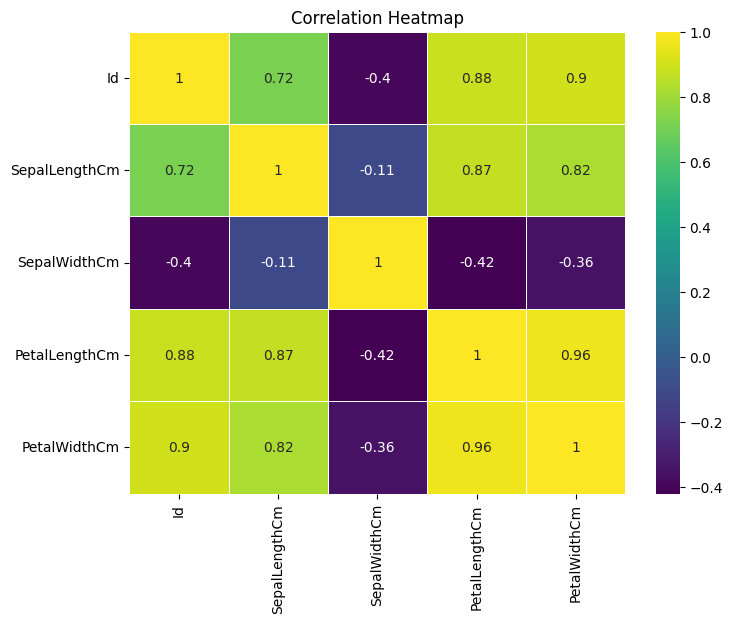

In [10]:
plot_heatmap(data)

The heatmap of the correlation matrix highlights strong positive correlations between petal length and petal width, as well as between sepal length and petal length.
This indicates that these pairs of features tend to increase or decrease together, suggesting potential redundancy or multicollinearity. Conversely, there is a weaker correlation between sepal width and the other features.

### Histogram:

In [11]:
def plot_histograms(data, features):
    """
    Plot histograms for multiple features in the dataset using subplots.

    Parameters:
        data (DataFrame): Input dataset.
            The dataset containing the features for which histograms are to be plotted.
        features (list): List of feature names.
            The names of the features for which histograms are to be plotted.

    Returns:
        None

    Raises:
        None
    """
    num_features = len(features)
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols

    plt.figure(figsize=(7, 7))

    for i, feature in enumerate(features, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(data=data, x=feature, kde=True)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(f'Histogram of {feature}')

    plt.tight_layout()
    plt.show()

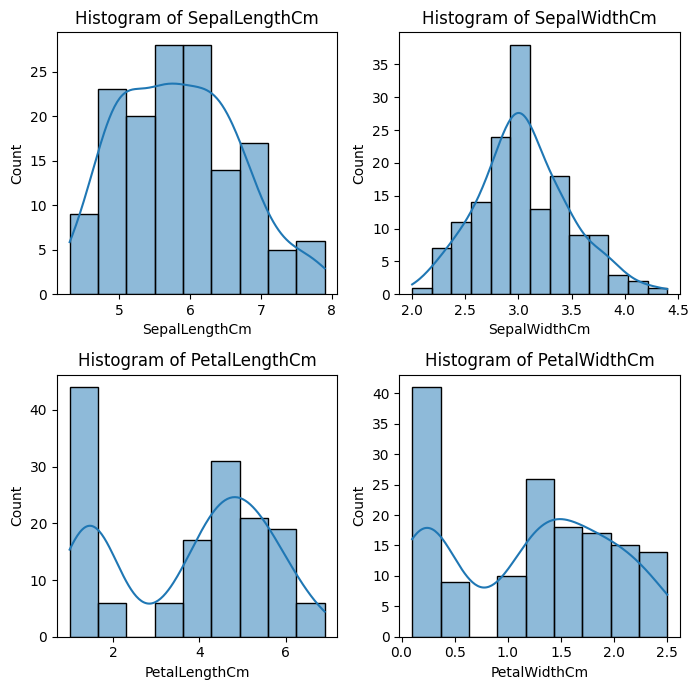

In [12]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plot_histograms(data, features)

The histogram reveals that the distribution of sepal lengths is somewhat normal, with the majority of samples having sepal lengths between approximately 4.5 and 7.5 centimeters.
This indicates that sepal lengths in the Iris dataset are relatively evenly distributed across a moderate range, with no extreme outliers.

## Linear Regression:

In [13]:
def evaluate_fitting(data, x_feature, y_feature, model):
    """
    Evaluate the quality of linear regression fitting using R-squared value.

    Parameters:
        data (DataFrame): Input dataset.
        x_feature (str): Name of the feature used as input.
        y_feature (str): Name of the feature predicted.
        model: Trained Linear Regression model.

    Returns:
        r_squared (float): R-squared value of the linear regression model.
    """
    X = data[[x_feature]]
    y_true = data[y_feature]
    y_pred = model.predict(X)
    residuals = y_true - y_pred
    ss_residual = np.sum(residuals ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

In [14]:
def train_linear_regression(data, x_feature, y_feature):
    """
    Train a Linear Regression model using the specified features.
    
    Parameters:
        data (DataFrame): Input dataset.
            The dataset containing the features used for training the model.
        x_feature (str): Name of the feature to use as input (independent variable).
            The name of the column in the dataset representing the independent variable.
        y_feature (str): Name of the feature to predict (dependent variable).
            The name of the column in the dataset representing the dependent variable.
    
    Returns:
        trained_model: Trained Linear Regression model.
            The trained Linear Regression model that can be used for making predictions.
    """
    X = data[[x_feature]]
    y = data[y_feature]
    lr = LinearRegression()
    lr.fit(X, y)
    return lr

In [15]:
def plot_linear_regression(data, model, x_feature, y_feature):
    """
    Plot the Linear Regression line on a scatter plot.
    
    Parameters:
        data (DataFrame): Input dataset.
            The dataset containing the features and target variable used for visualization.
        model: Trained Linear Regression model.
            The trained Linear Regression model to be visualized.
        x_feature (str): Name of the feature to use as input (independent variable).
            The name of the column in the dataset representing the independent variable.
        y_feature (str): Name of the feature to predict (dependent variable).
            The name of the column in the dataset representing the dependent variable.
    """
    # Scatter plot of the data
    plt.scatter(data[x_feature], data[y_feature], c=data['Species'].astype('category').cat.codes, cmap='viridis', label='Data')
    
    # Predictions using the model
    x_values = np.linspace(data[x_feature].min(), data[x_feature].max(), 100)
    y_pred = model.predict(x_values.reshape(-1, 1))
    
    # Confidence interval calculation (assuming normal distribution)
    y_std = np.std(data[y_feature].values)
    confidence_interval = 1.96 * y_std  # 95% confidence interval (approximation for large sample size)
    
    # Plotting the regression line with confidence interval
    plt.plot(x_values, y_pred, color='red', label='Regression Line')
    plt.fill_between(x_values, y_pred - confidence_interval, y_pred + confidence_interval, color='gray', alpha=0.3, label='Confidence Interval')
    
    plt.title(f'Linear Regression: {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.colorbar(label='Species')
    plt.legend()
    plt.show()

    # Calculate R-squared value
    r_squared = evaluate_fitting(data, x_feature, y_feature, model)
    print(f"R-Squared Value: {r_squared:.2f}")

By performing linear regression on the relationship between petal length and petal width, we aim to understand the linear trend or correlation between these two features.

In [16]:
lr_model = train_linear_regression(data, 'PetalLengthCm', 'PetalWidthCm')

C:\Users\CORE COM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


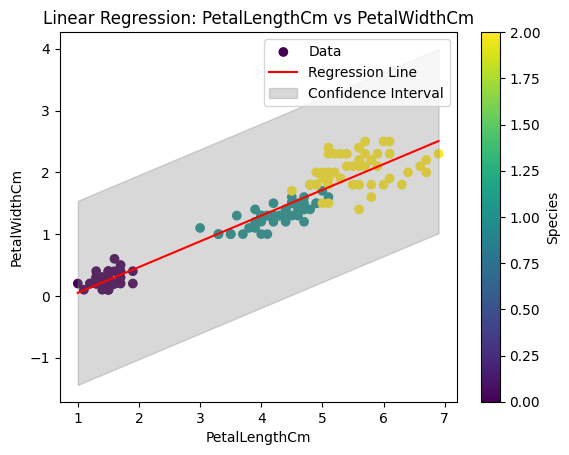

R-Squared Value: 0.93


In [17]:
plot_linear_regression(data, lr_model, 'PetalLengthCm', 'PetalWidthCm')

The fitted line helps us visualize the direction and strength of the relationship between petal length and petal width. It provides insights into how changes in sepal length affect sepal width.

The linear regression line fitted on the scatter plot of sepal length vs sepal width shows a positive correlation between the two features.
This suggests that as petal length increases, petal width tends to increase as well, albeit with some variation. The slope of the line indicates the magnitude of this relationship.

In [18]:
from sklearn.metrics import silhouette_score

def evaluate_clustering(X, labels):
    """
    Evaluate the quality of clustering using silhouette score.

    Parameters:
        X (DataFrame): Input features.
        labels (array): Predicted cluster labels.

    Returns:
        silhouette_avg (float): Average silhouette score.
    """
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

## Elbow Plot:

In [19]:
def plot_elbow_method(data, numerical_features):
    """
    Plot the within-cluster sum of squares (WCSS) against the number of clusters (K)
    to determine the optimal number of clusters using the elbow method.
    
    Parameters:
        data (DataFrame): Input dataset.
        numerical_features (list): List of numerical features to use for clustering.
    """
    # Prepare the feature matrix by selecting the numerical features from the dataset
    X = data[numerical_features]

    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot the within-cluster sum of squares (WCSS) against the number of clusters (K)
    plt.plot(range(1, 11), wcss)
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method: Optimal Number of Clusters')
    plt.show()

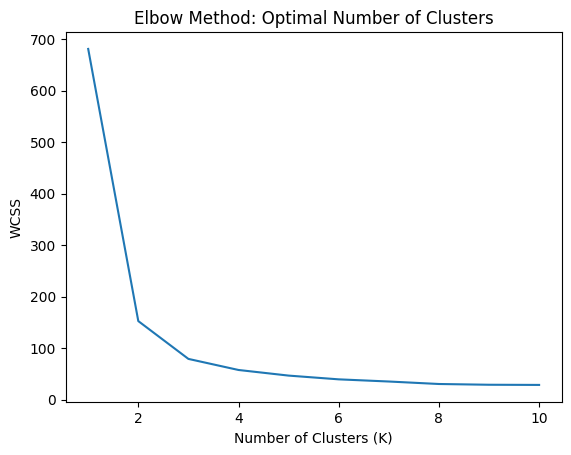

In [20]:
plot_elbow_method(data, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

The WCSS decreases as the number of clusters increases. This is expected because when the number of clusters increases, each point becomes closer to the centroid of its cluster, and therefore, the sum of squares decreases.

The rate of decrease of WCSS is steep until around 2 clusters, after which the rate of decrease significantly slows down. This point, where the rate of decrease changes most significantly, is known as the "elbow", and it's typically considered as the optimal number of clusters.



In this case, the elbow plot suggests that the optimal number of clusters for the Iris dataset is around 2. However, we know that there are actually 3 species of Iris flowers in the dataset. This discrepancy might be due to the overlap between the Versicolor and Virginica species that we observed in the previous analyses. It's a reminder that while the elbow method is a useful heuristic, it doesn't always identify the true number of clusters, especially when there's overlap between the clusters.

## K-Means Clustering:

In [21]:
def train_kmeans(X, n_clusters):
    """
    Train K-Means clustering model.
    
    Parameters:
        X (DataFrame): Input features.
        n_clusters (int): Number of clusters.
    
    Returns:
        kmeans: Trained K-Means model.
        labels (array): Predicted cluster labels.
        centroids (array): Cluster centroids.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return kmeans, labels, centroids

In [30]:
def visualize_clusters(X, labels, centroids):
    """
    Visualize K-Means clusters along with centroids.

    This function generates a scatter plot to visualize the K-Means clusters along with their centroids.
    Each cluster is represented by a different color, and the centroids are marked with red stars.

    Parameters:
        X (DataFrame): Input features.
            The input feature matrix containing the data points.
        labels (array): Predicted cluster labels.
            An array containing the predicted cluster labels for each data point.
        centroids (array): Cluster centroids.
            An array containing the centroid coordinates for each cluster.
            
    """
    plt.scatter(X.iloc[labels == 0, 0], X.iloc[labels == 0, 1], s=100, c='purple', label='Virginica')
    plt.scatter(X.iloc[labels == 1, 0], X.iloc[labels == 1, 1], s=100, c='skyblue', label='Versicolor')
    plt.scatter(X.iloc[labels == 2, 0], X.iloc[labels == 2, 1], s=100, c='yellow', label='Setosa')

    # Plotting the centroids of the clusters
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='*', label='Centroids')

    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('K-Means Clustering of Iris Dataset')
    plt.legend()
    plt.show()

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Score: {silhouette_avg:.2f}")

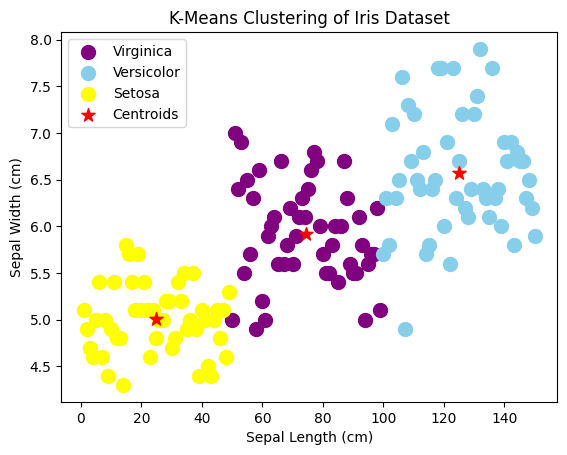

Silhouette Score: 0.58


In [31]:

# Example usage:
k = 3
X = data.drop('Species', axis=1)
kmeans, labels, centroids = train_kmeans(X, k)
visualize_clusters(X, labels, centroids)

The algorithm has grouped the data into three clusters, which aligns with the three species of Iris flowers in the dataset.

The cluster at the bottom left, which corresponds to the Setosa species, is well-separated from the other two clusters. This aligns with our previous observations that Setosa has distinct petal measurements compared to the other two species.

The other two clusters, which likely correspond to the Versicolor and Virginica species, show some overlap. This also aligns with our previous observations that these two species have similar petal measurements.